Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [25]:
from random import random, seed
from itertools import product
from itertools import accumulate 
import numpy as np

from icecream import ic

from tqdm.auto import tqdm 
from matplotlib import pyplot as plt



## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [26]:
UNIVERSE_SIZE = 10_000
NUM_SETS = 1000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [27]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [28]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [29]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(4277568.879320375))

Improvement found at step 0: cost = 2131126.4182437784
Improvement found at step 1: cost = 2126580.5023479224
Improvement found at step 2: cost = 2117643.220302576
Improvement found at step 3: cost = 2109548.1315614907
Improvement found at step 4: cost = 2096752.3725343372
Improvement found at step 5: cost = 2088066.6647971843
Improvement found at step 6: cost = 2075218.806841397
Improvement found at step 7: cost = 2066862.0646837677
Improvement found at step 8: cost = 2053972.408885438
Improvement found at step 9: cost = 2045449.1064836918
Improvement found at step 11: cost = 2028174.1343381396
Improvement found at step 12: cost = 2015362.3218513718
Improvement found at step 14: cost = 2011181.728942285
Improvement found at step 15: cost = 1998546.0298115658
Improvement found at step 16: cost = 1985731.5103495172
Improvement found at step 17: cost = 1977471.9416192388
Improvement found at step 18: cost = 1965060.957483814
Improvement found at step 19: cost = 1952537.8758992061
Improve

ic| min_cost: np.float64(1577068.1818279596)
ic| history: [np.float64(2135469.2674081335),
              np.float64(2131126.4182437784),
              np.float64(2126580.5023479224),
              np.float64(2117643.220302576),
              np.float64(2109548.1315614907),
              np.float64(2096752.3725343372),
              np.float64(2088066.6647971843),
              np.float64(2075218.806841397),
              np.float64(2066862.0646837677),
              np.float64(2053972.408885438),
              np.float64(2045449.1064836918),
              np.float64(2045449.1064836918),
              np.float64(2028174.1343381396),
              np.float64(2015362.3218513718),
              np.float64(2015362.3218513718),
              np.float64(2011181.728942285),
              np.float64(1998546.0298115658),
              np.float64(1985731.5103495172),
              np.float64(1977471.9416192388),
              np.float64(1965060.957483814),
              np.float64(1952537.8758992

Improvement found at step 64: cost = 1631237.2970601416
Improvement found at step 65: cost = 1618408.6157982035


              np.float64(1888636.7376944015),
              np.float64(1875485.831708275),
              np.float64(1866968.9159762254),
              np.float64(1863007.534753933),
              np.float64(1854540.4650945081),
              np.float64(1845809.8853372522),
              np.float64(1837603.7779419664),
              np.float64(1820184.966043018),
              np.float64(1811586.314577165),
              np.float64(1799401.906794504),
              np.float64(1795218.9663767114),
              np.float64(1782151.9428628664),
              np.float64(1765159.7700399493),
              np.float64(1760972.1342454785),
              np.float64(1760807.2390135925),
              np.float64(1743741.8504867158),
              np.float64(1743732.3635372496),
              np.float64(1739335.3656128207),
              np.float64(1739335.3656128207),
              np.float64(1734879.554745275),
              np.float64(1726299.7833967137),
              np.float64(1713687.0497791

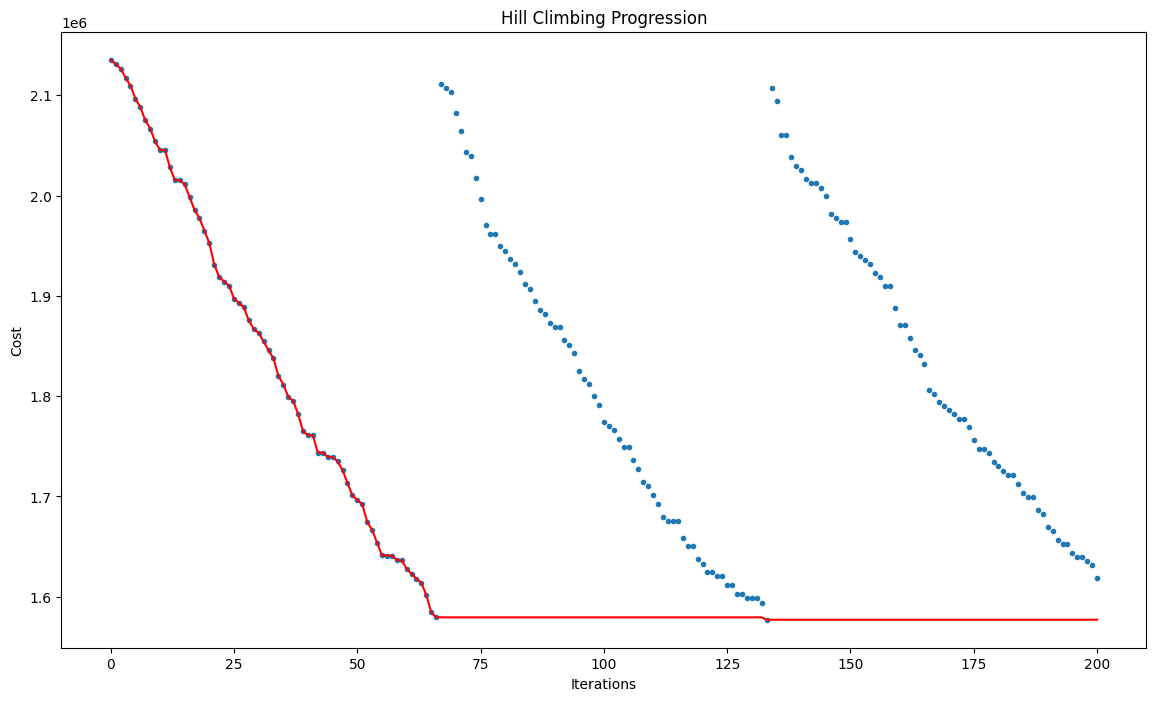

In [30]:
# parametri per Steepest Step and Restart solo che adesso cerco il costo minimo
NUM_RESTARTS = 3  
STEEPEST_STEP_CANDIDATES = 5  
TRUE_MAX_STEPS = 1000 // STEEPEST_STEP_CANDIDATES  
history = list()  
best_solution = None  
min_cost = float('inf')  # costo minimo inizializzato all'infinito

#tweak
def tweak(solution):
    new_solution = solution.copy()
    # cambia set
    for _ in range(np.random.randint(1, 10)): 
        idx = np.random.randint(0, NUM_SETS)
        new_solution[idx] = not new_solution[idx]
    return new_solution

#hill climbing
for i in range(NUM_RESTARTS):
    #random
    solution = rng.random(NUM_SETS) < .5
    history.append(cost(solution))
    
    while not valid(solution):
        solution = rng.random(NUM_SETS) < .5

    for step in range(TRUE_MAX_STEPS // NUM_RESTARTS):
        #cambio la soluzione
        candidates = [tweak(solution) for _ in range(STEEPEST_STEP_CANDIDATES)]
        candidates = [c for c in candidates if valid(c)]  

        #se non ce ne sono
        if not candidates:
            continue

        candidates_costs = [cost(c) for c in candidates]

        #cerco il costo migliore
        best_candidate_idx = np.argmin(candidates_costs)
        best_candidate = candidates[best_candidate_idx]
        best_candidate_cost = candidates_costs[best_candidate_idx]

        #sostituisco in caso
        if best_candidate_cost < cost(solution):
            solution = best_candidate
            history.append(best_candidate_cost)
            print(f"Improvement found at step {step}: cost = {best_candidate_cost}")
        else:
            history.append(cost(solution)) 

    #aggiorno la soluzione
    current_cost = cost(solution)
    if current_cost < min_cost:
        min_cost = current_cost
        best_solution = solution

ic(min_cost)  
ic(history)

#come evolve il costo
plt.figure(figsize=(14, 8))
plt.plot(range(len(history)), list(accumulate(history, min)), color="red")
plt.scatter(range(len(history)), history, marker=".")
plt.title("Hill Climbing Progression")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
